In [1]:
#Analysis on Banking Dataset
#installing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve



In [2]:
# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# Read csv file with pandas pd_readcsv
train = pd.read_csv("D:\DataAnalystPortfolio\8Banking/train.csv", sep=';')
test = pd.read_csv("D:\DataAnalystPortfolio\8Banking/test.csv", sep=';')

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
#checking missing values
print(train.isna().values.any())
print(train.isna().sum())

False
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
#checking duplicate values
print(train.duplicated().value_counts())

False    45211
dtype: int64


In [9]:
#removing white spaces
train.columns = train.columns.str.replace(' ', '')

In [10]:
job_status = train["job"]
print(job_status.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [11]:
marriage_status = train["marital"]
print(marriage_status.value_counts())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


In [12]:
education_status = train["education"]
print(education_status.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [13]:
default_status = train["default"]
print(default_status.value_counts())

no     44396
yes      815
Name: default, dtype: int64


In [14]:
housing_status = train["housing"]
print(housing_status.value_counts())

yes    25130
no     20081
Name: housing, dtype: int64


In [15]:
contact = train["contact"]
print(contact.value_counts())

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


In [16]:
loan_status = train["loan"]
print(loan_status.value_counts())

no     37967
yes     7244
Name: loan, dtype: int64


In [17]:
previous_status = train["previous"]
print(previous_status.value_counts())
36954

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64


36954

In [18]:
poutcome_status = train["poutcome"]
print(poutcome_status.value_counts())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


In [19]:
y_status = train["y"]
print(y_status.value_counts())

no     39922
yes     5289
Name: y, dtype: int64


In [20]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
print(train.corr())

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


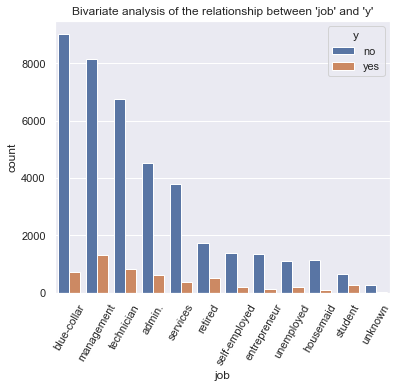

In [22]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = train, hue = "y", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'job' and 'y'")
plt.show()

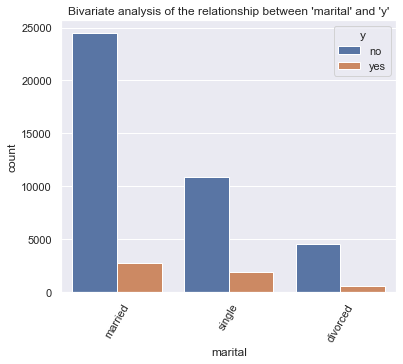

In [23]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "y", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'marital' and 'y'")
plt.show()

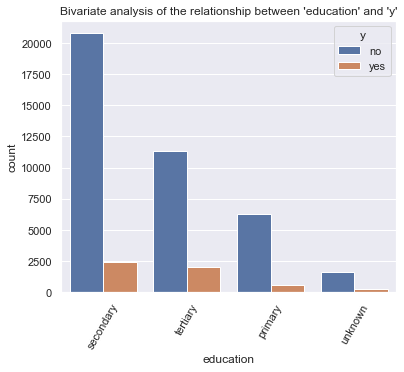

In [24]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "y", order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'education' and 'y'")
plt.show()

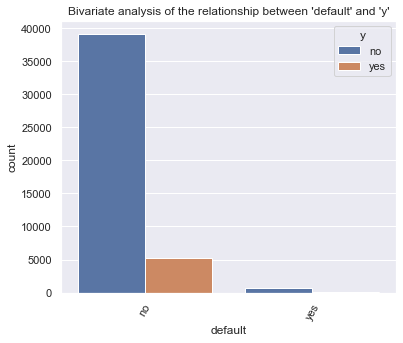

In [25]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "y", order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'default' and 'y'")
plt.show()

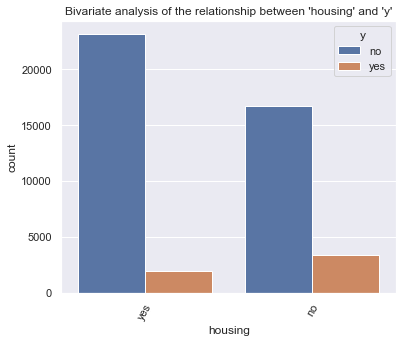

In [26]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "y", order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'housing' and 'y'")
plt.show()

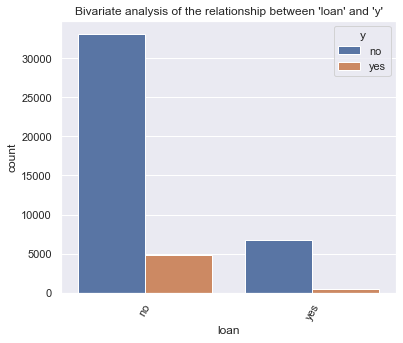

In [27]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "y", order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'loan' and 'y'")
plt.show()

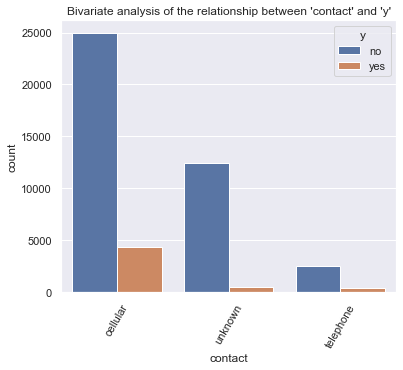

In [28]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "y", order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'contact' and 'y'")
plt.show()

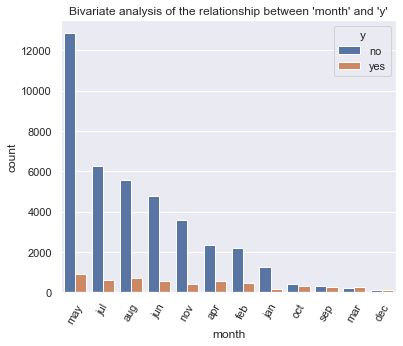

In [29]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="month", data = train, hue = "y", order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'month' and 'y'")
plt.show()

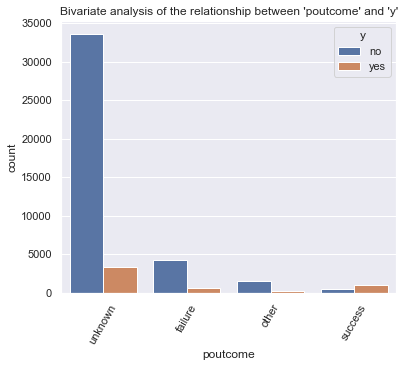

In [30]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train, hue = "y", order = train["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'poutcome' and 'y'")
plt.show()

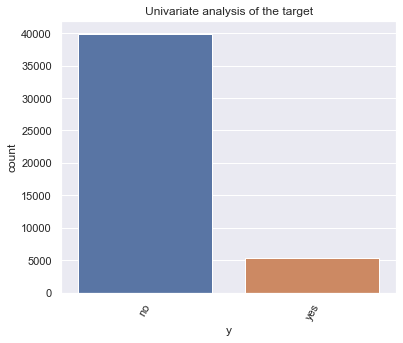

In [31]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="y", data = train, order = train["y"].value_counts().index)
target.tick_params(axis='x', rotation=60)
plt.title("Univariate analysis of the target")
plt.show()

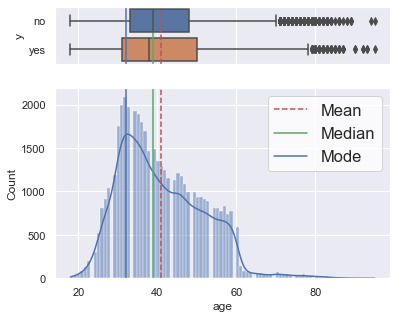

In [32]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['age'].mean()
median=train['age'].median()
mode=train['age'].mode().values[0]

age = sns.boxplot(data=train, x="age", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

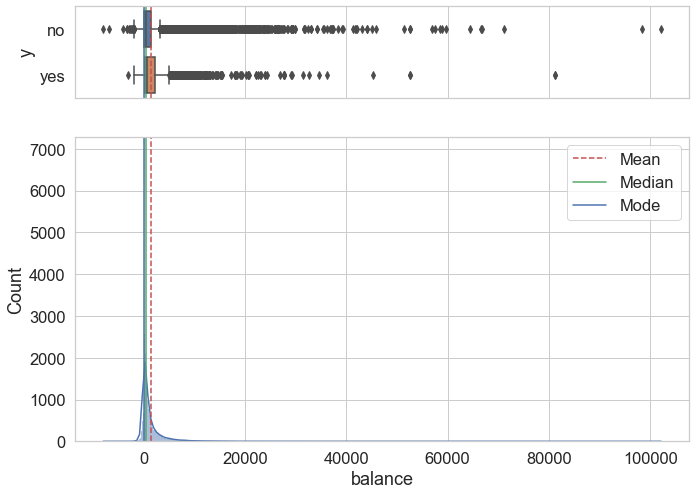

In [33]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['balance'].mean()
median=train['balance'].median()
mode=train['balance'].mode().values[0]

balance = sns.boxplot(data=train, x="balance", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

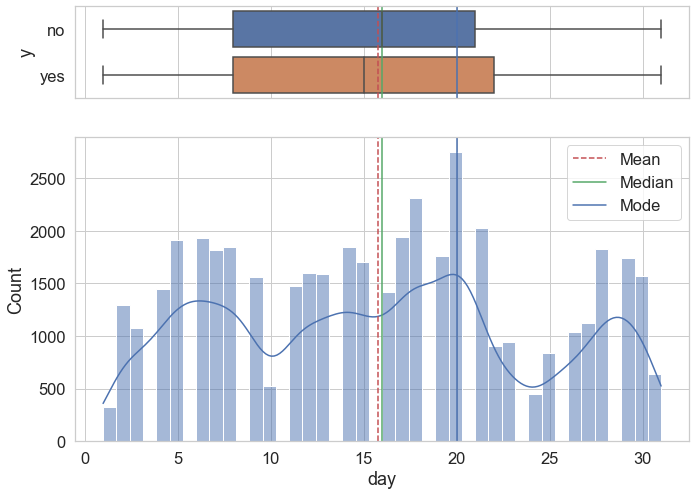

In [34]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['day'].mean()
median=train['day'].median()
mode=train['day'].mode().values[0]

day = sns.boxplot(data=train, x="day", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

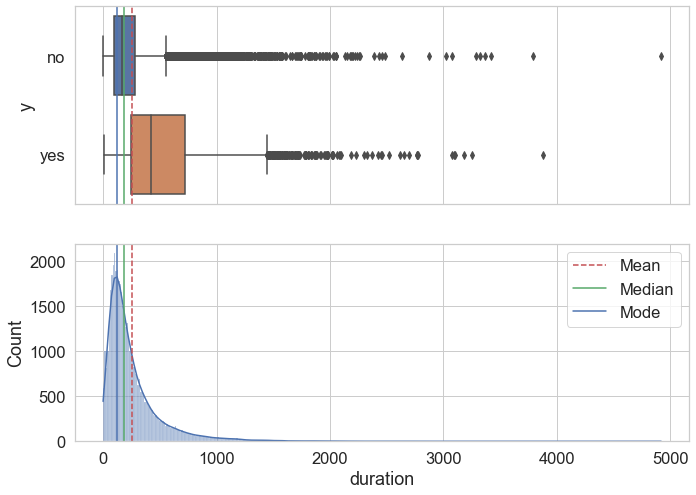

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['duration'].mean()
median=train['duration'].median()
mode=train['duration'].mode().values[0]

duration = sns.boxplot(data=train, x="duration", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

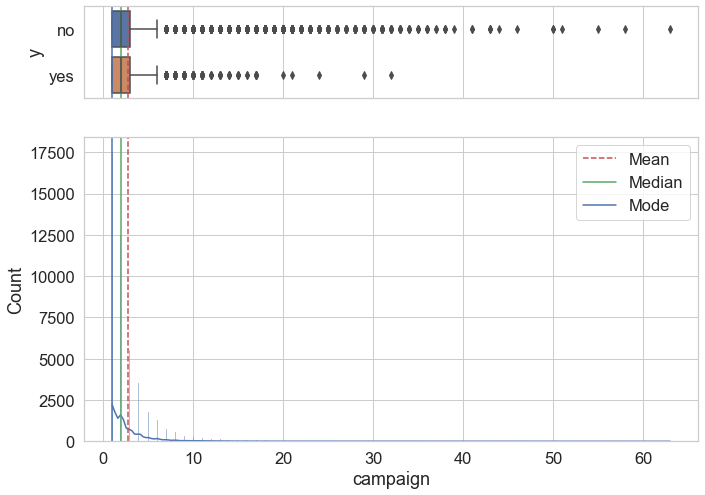

In [36]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['campaign'].mean()
median=train['campaign'].median()
mode=train['campaign'].mode().values[0]

campaign = sns.boxplot(data=train, x="campaign", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="campaign", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

40.19782796222158
-1.0


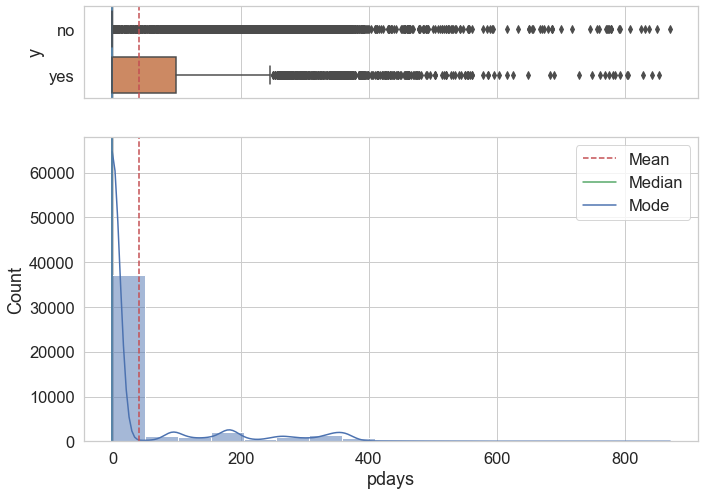

In [37]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['pdays'].mean()
print(mean)
median=train['pdays'].median()
print(median)
mode=train['pdays'].mode().values[0]

pdays = sns.boxplot(data=train, x="pdays", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

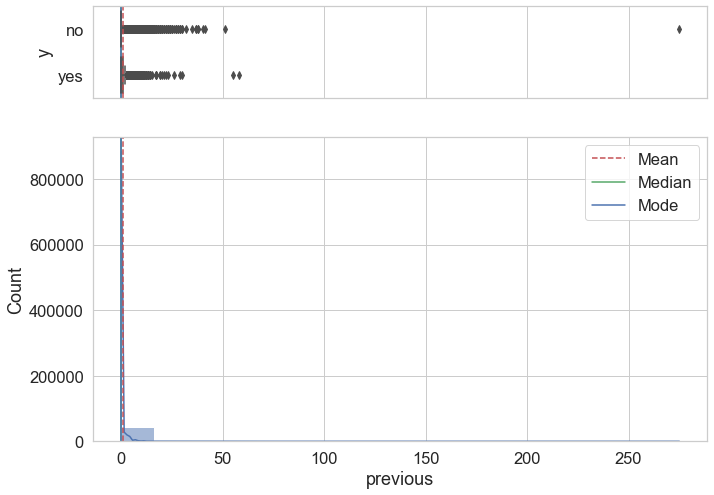

In [38]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.5, style='whitegrid')
mean=train['previous'].mean()
median=train['previous'].median()
mode=train['previous'].mode().values[0]

previous = sns.boxplot(data=train, x="previous", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()


In [39]:
train_copy = train.copy()
test_copy = test.copy()

# Set up a flag to distinguish records in the concatenated dataset
train_copy['tst'] = 0
test_copy['tst'] = 1

# Concatenate train and test dataset to perform pre-prepocessing
train_test_concat = pd.concat([train_copy, test_copy], ignore_index=True)
del train_copy
del test_copy
gc.collect()

print(train_test_concat.shape)
print(train.shape)
print(test.shape)

(49732, 18)
(45211, 17)
(4521, 17)


In [40]:
# a. Replace method: Mode value
train_test_concat["job"].replace(["unknown"],train_test_concat["job"].mode(),inplace = True)
train_test_concat["education"].replace(["unknown"],train_test_concat["education"].mode(),inplace = True)
train_test_concat["contact"].replace(["unknown"],train_test_concat["contact"].mode(),inplace = True)

In [41]:
# b. Drop unrepresentative features
train_test_concat.drop(columns = ["month", "previous", "day", "pdays"], inplace = True)
print(train_test_concat)

       age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married  secondary      no     1506     yes   no   
4       33    blue-collar   single  secondary      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  duration  campaign poutcome   y  t

In [42]:
#Encoding categorical features.
train_test_concat['default'] = train_test_concat['default'].map({'yes': 1, 'no': 0})
train_test_concat['housing'] = train_test_concat['housing'].map({'yes': 1, 'no': 0})
train_test_concat['loan'] = train_test_concat['loan'].map({'yes': 1, 'no': 0})
train_test_concat['contact'] = train_test_concat['contact'].map({'telephone': 1, 'cellular': 0})
train_test_concat['y'] = train_test_concat['y'].map({'yes': 1, 'no': 0})
train_test_concat

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y,tst
0,58,management,married,tertiary,0,2143,1,0,0,261,1,unknown,0,0
1,44,technician,single,secondary,0,29,1,0,0,151,1,unknown,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,76,1,unknown,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,0,92,1,unknown,0,0
4,33,blue-collar,single,secondary,0,1,0,0,0,198,1,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,0,-333,1,0,0,329,5,unknown,0,1
49728,57,self-employed,married,tertiary,1,-3313,1,1,0,153,1,unknown,0,1
49729,57,technician,married,secondary,0,295,0,0,0,151,11,unknown,0,1
49730,28,blue-collar,married,secondary,0,1137,0,0,0,129,4,other,0,1


In [43]:
#['job', 'marital', 'education', 'poutcome'] are categorical variable that are converted into dummy/indicator variables.

train_test_concat = pd.get_dummies(train_test_concat, columns=['job', 'marital', 'education', 'poutcome'])
train_test_concat

,age,default,balance,housing,loan,contact,duration,campaign,y,tst,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,261,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,0,151,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,0,76,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,0,92,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,33,0,1,0,0,0,198,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,0,-333,1,0,0,329,5,0,1,...,0,1,0,0,1,0,0,0,0,1
49728,57,1,-3313,1,1,0,153,1,0,1,...,0,1,0,0,0,1,0,0,0,1
49729,57,0,295,0,0,0,151,11,0,1,...,0,1,0,0,1,0,0,0,0,1
49730,28,0,1137,0,0,0,129,4,0,1,...,0,1,0,0,1,0,0,1,0,0


In [44]:
# Training, Test, & Split
y = train_test_concat["y"]
X = train_test_concat.drop("y",axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Logistic Regression Model 1: The performance did not improve with data scaling.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [45]:
# Evaluation 1.
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[17226  1583]
 [  374   710]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     17600
           1       0.65      0.31      0.42      2293

    accuracy                           0.90     19893
   macro avg       0.79      0.64      0.68     19893
weighted avg       0.89      0.90      0.89     19893

Accuracy: 0.9016236867239733
Precision: 0.6549815498154982
Recall: 0.30963802878325336
Cross Validation mean: 0.8988237473216184


In [46]:
ROS = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ROS)

array([26322, 26322], dtype=int64)

In [47]:
# Second test of LR model with oversampling
logreg_oversampling = LogisticRegression(solver='liblinear')
logreg_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_oversampling = logreg_oversampling.predict(X_test)

In [48]:
# Evaluation 2.
print(confusion_matrix(y_pred_oversampling, y_test))
print(classification_report(y_test, y_pred_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oversampling))
print("Precision:",metrics.precision_score(y_test, y_pred_oversampling))
print("Recall:",metrics.recall_score(y_test, y_pred_oversampling))
print('Cross Validation mean:',(cross_val_score(logreg, X_train, y_train, cv=5, n_jobs=2, scoring = 'accuracy').mean()))

[[14648   514]
 [ 2952  1779]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     17600
           1       0.38      0.78      0.51      2293

    accuracy                           0.83     19893
   macro avg       0.67      0.80      0.70     19893
weighted avg       0.90      0.83      0.85     19893

Accuracy: 0.8257678580405168
Precision: 0.3760304375396322
Recall: 0.7758395115569123
Cross Validation mean: 0.8988237473216184


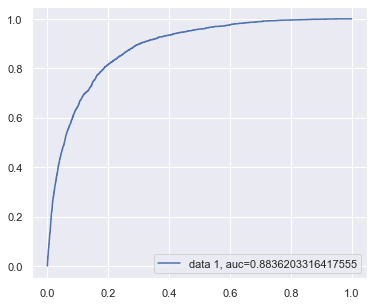

In [49]:
y_pred_proba = logreg_oversampling.predict_proba(X_test)[:,1]
sns.set(rc = {'figure.figsize':(6, 5)})
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()